In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [41]:
# Set Seaborn theme for plots
sns.set_theme()

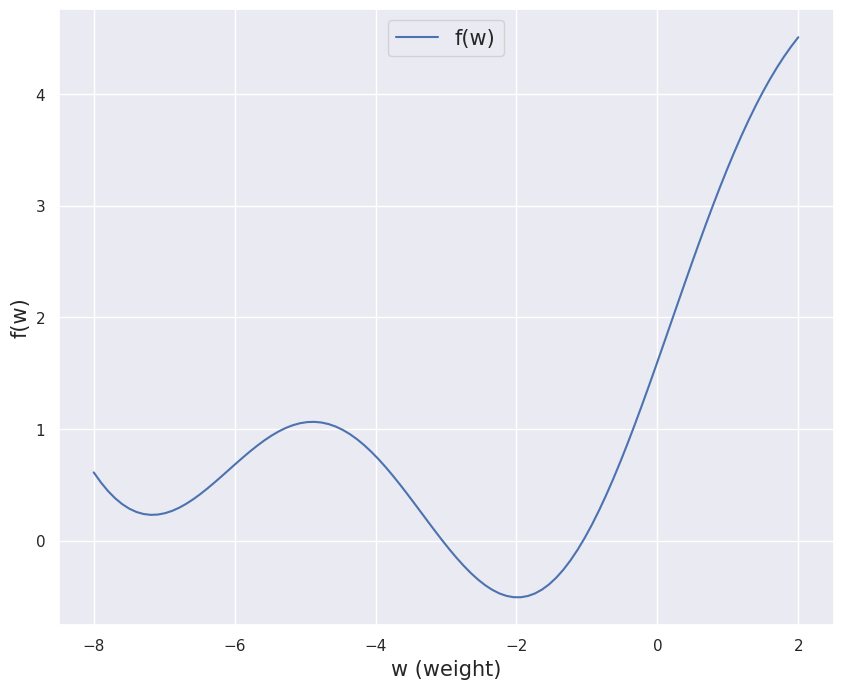

In [42]:
# Define the function to minimize
def f(w):
    return 0.1 * (w + 4)**2 + np.sin(w)

# Define domain variables for plotting f
domain = np.linspace(-8, 2, 100)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w)")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.show()

### The Problem Description

The function under consideration is given by:

f(w) = 0.1 * (w + 4)^2 + sin(w)

Clearly, this function exhibits a global minimum at w = -2. To discover this minimum without prior knowledge, we need to solve the optimization problem:

min_w f(w)


#### Gradient-Based Optimization

The approach involves initiating the search with a guess. Suppose we begin by assuming that the minimum value of f(w) occurs at w_0 = 1. We can visualize this initial point by executing the following code in the cell below.


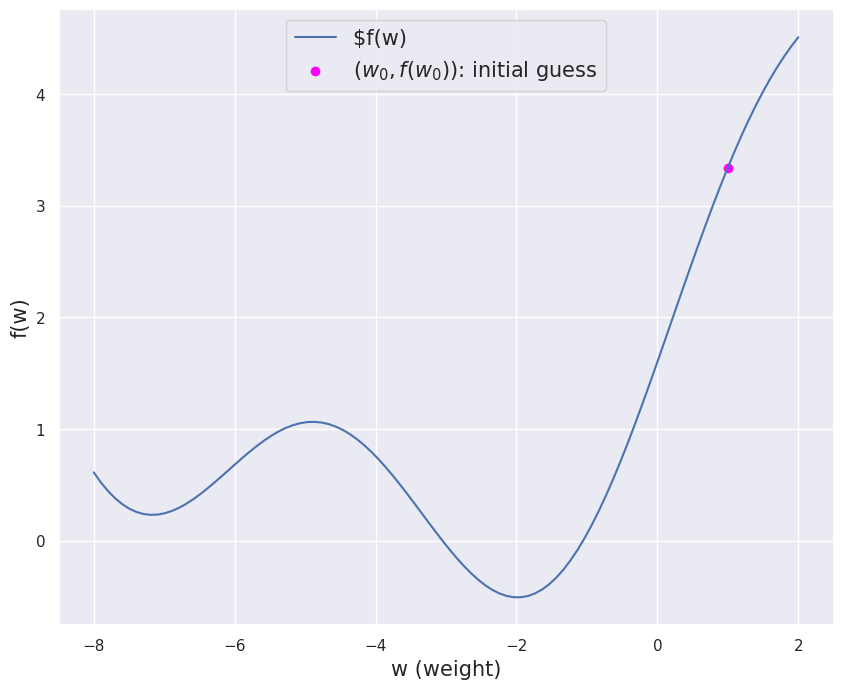

In [43]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) ")
plt.scatter([1], [f(1)], color = "magenta", label = "$(w_0, f(w_0))$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.show()

The code below visualizes the parabola function along with the tangent line at an initial guess point, providing a graphical representation of the optimization process using gradient-based methods.

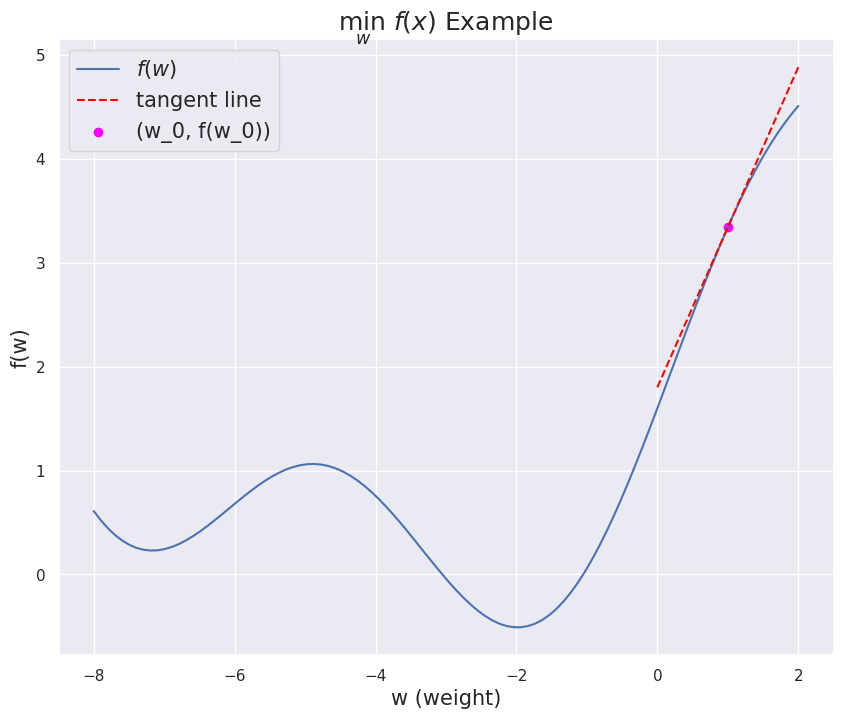

In [44]:
# Define parabola derivative
def df(w):
    return 0.2 * (w + 4) + np.cos(w)

# Choose w_0
w_0 = 1.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i=0, color="magenta", show=True):
    # Define tangent line: y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i) * (w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
                 line(wrange),
                 '--',
                 linewidth=1.5,
                 color="red",
                 label="tangent line")
    plt.scatter([w_i], [function(w_i)], color=color, label=f"(w_{i}, f(w_{i}))")

# Plot the figure
plt.figure(figsize=(10, 8))

# Plot the function
plt.plot(domain, f(domain), label="$f(w)$")

# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize=15)
plt.ylabel("f(w)", fontsize=15)
plt.legend(fontsize=15)
plt.title("$\min_w$ $f(x)$ Example", fontsize=18)
plt.show()

### Direction of Descent and the Learning Rate

Upon observing the figure generated by the code above, it is evident that the tangent line implies a direction of descent. Specifically, at the point w_0, the tangent line exhibits a positive slope. This implies the necessity to move in the negative direction (to the left of w_0) to reach a smaller value of f(w).

#### Determining the Step Size (Learning Rate)

The distance by which we move in the opposite sign of the derivative of f at w_0 is termed the learning rate.

The gradient descent algorithm involves multiplying the derivative of f at w_0 by the learning rate and updating w_0 accordingly.

#### Gradient Descent Iteration

To implement one iteration of the gradient descent algorithm, choose a learning rate and then execute the following code in the cell below:


w_0 = 1.0
w_1 = -0.2322418446945118


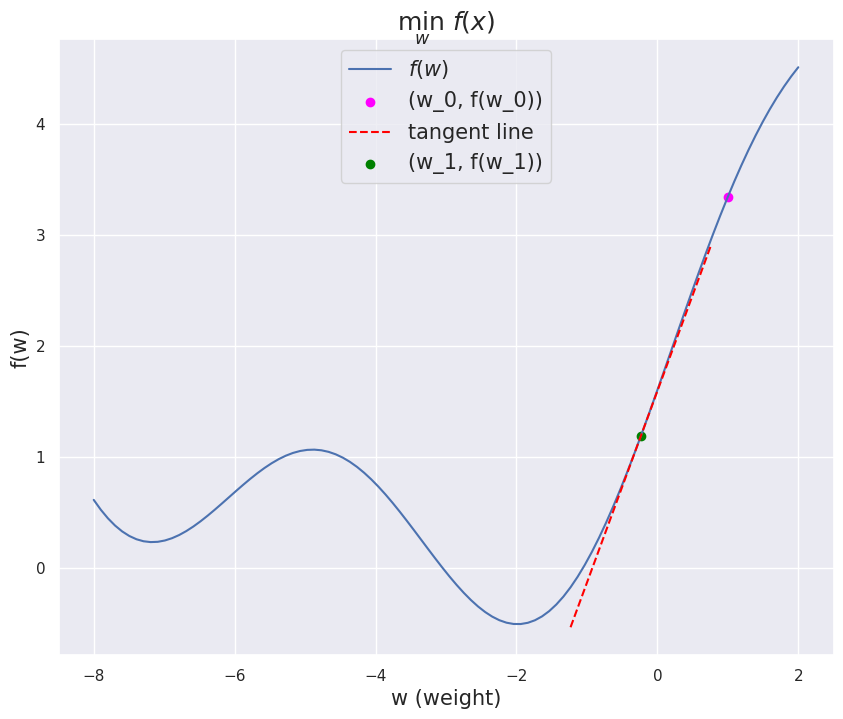

In [45]:
# Initialize choice of w
w_0 = 1.0

# Set learning rate
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w)$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 1.0
w_1 = -0.2322418446945118
w_2 = -1.6136054363223464


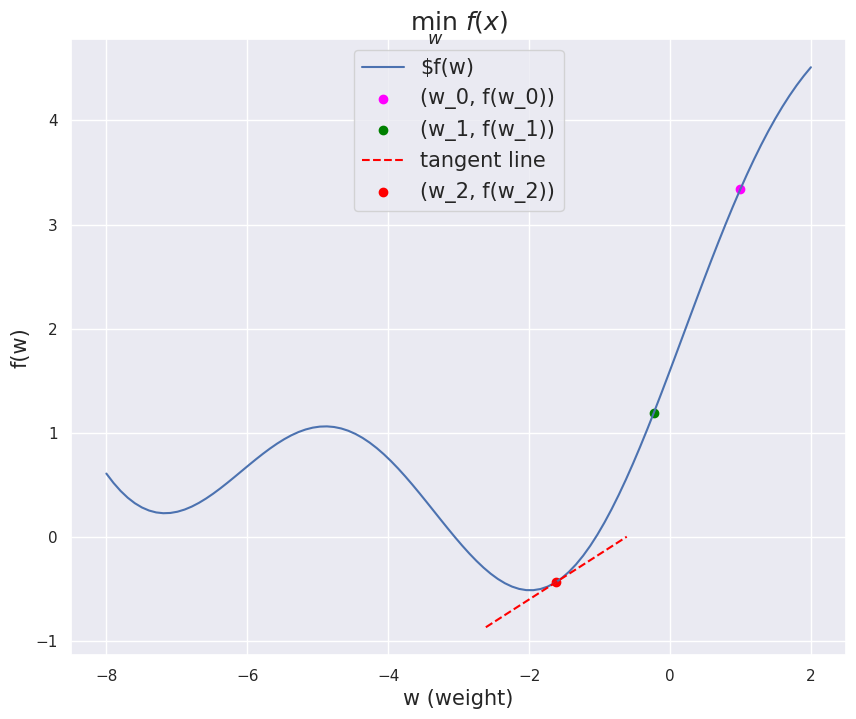

In [46]:
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w)")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 1.0
w_1 = -0.2322418446945118
w_2 = -1.6136054363223464
w_3 = -1.9611917383069244


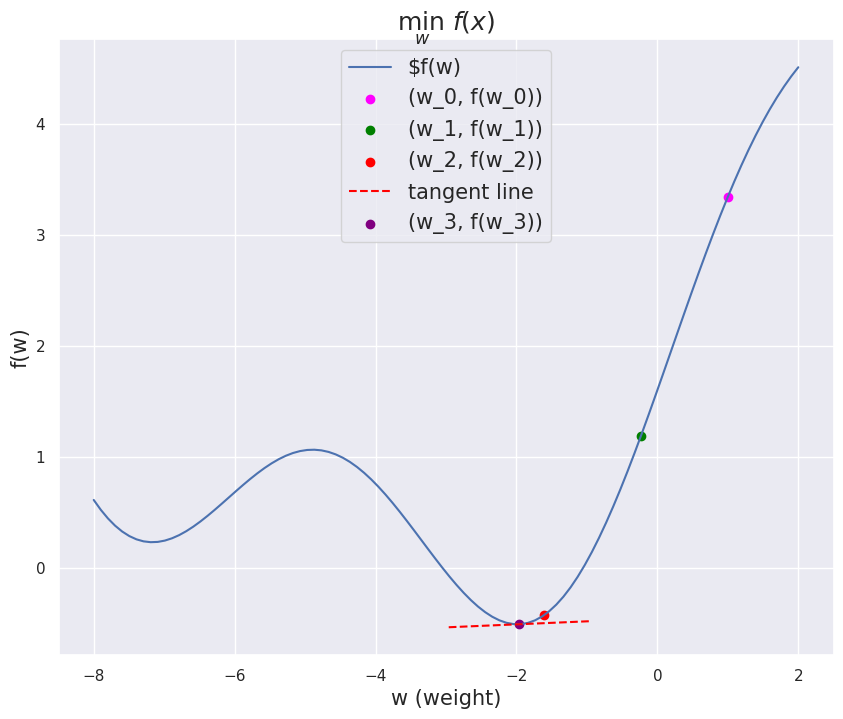

In [47]:
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w)")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

We can easily iterate this process of updating
 by writing a function called derivative_descent.

w_0 = 1.0 | df(w_0) = 1.5403023058681398
w_1 = -0.23 | df(w_1) = 1.7267044895347932
w_2 = -1.61 | df(w_2) = 0.43448287748072256
w_3 = -1.96 | df(w_3) = 0.027207547256416553
w_4 = -1.98 | df(w_4) = 0.0028177392842008153
w_5 = -1.99 | df(w_5) = 0.0003025016075636211



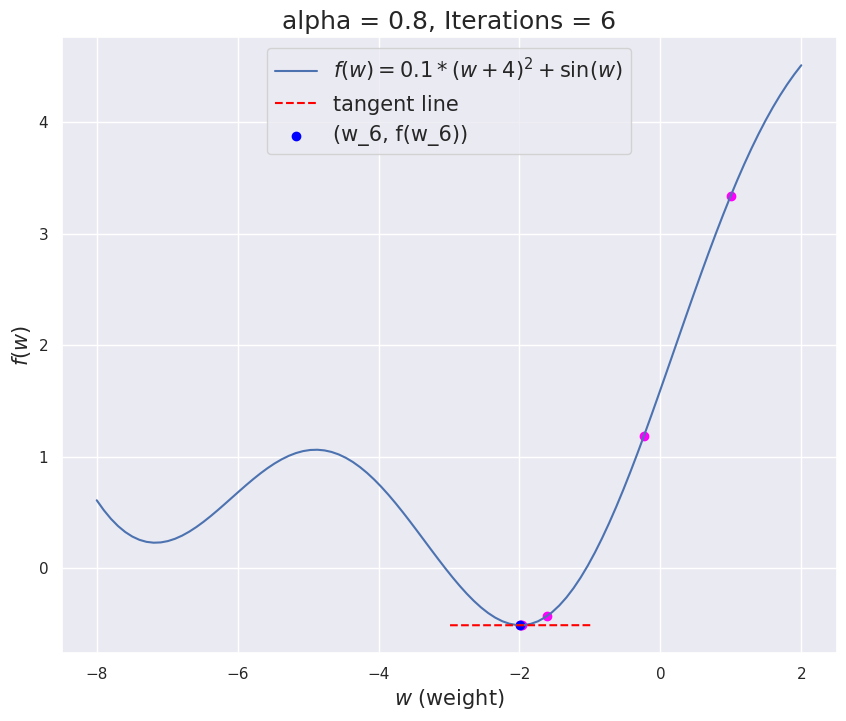

In [48]:
# Function for derivative descent optimization
def derivative_descent(derivative, alpha=0.8, w_0=1.0, max_iter=1_000):
    W = [w_0]
    i = 0
    # Continue iterating until the derivative is close to zero or maximum iterations are reached
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        # Update w using gradient descent
        w_new = W[-1] - alpha * derivative(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)
    return W

# Apply derivative descent to the provided derivative function df
W = derivative_descent(df)

# Print the results
for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals=2)} | df(w_{i}) = {df(w)}")
print("")

# Plot the figure
plt.figure(figsize=(10, 8))
plt.plot(domain, f(domain), label="$f(w) = 0.1 * (w + 4)^2 + \sin(w)$")
plt.scatter(W, f(W), color="magenta")

# Visualize the tangent line at the last point in the iteration
tangent_line(W[-1], f, df, i=len(W), color="blue")
plt.xlabel("$w$ (weight)", fontsize=15)
plt.ylabel("$f(w)$", fontsize=15)
plt.legend(fontsize=15, loc="upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize=18)
plt.show()

Testing different choices of the Learning Rate

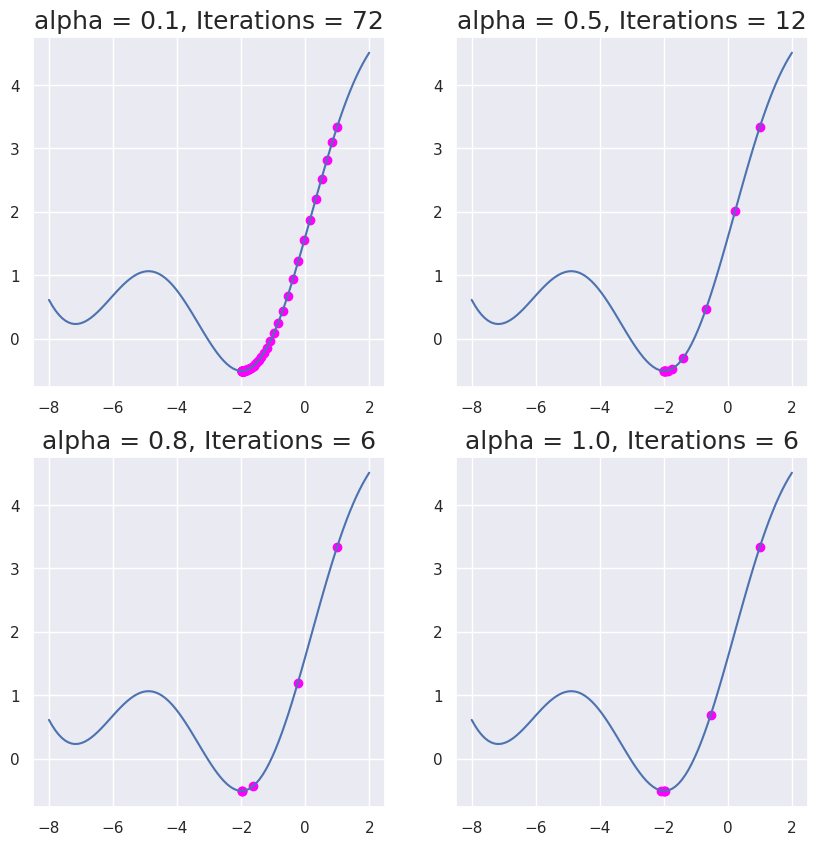

In [49]:
# Possible choices of learning rate
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

## Minimizing Functions of Several Variables

In the realm of optimization, the principles discussed earlier elegantly extend to functions of several variables when the single-variable derivative is replaced by the gradient.

The code below serves as a guide to extending optimization techniques to functions of several variables, providing clarity on the implementation of gradient descent for multivariable functions.

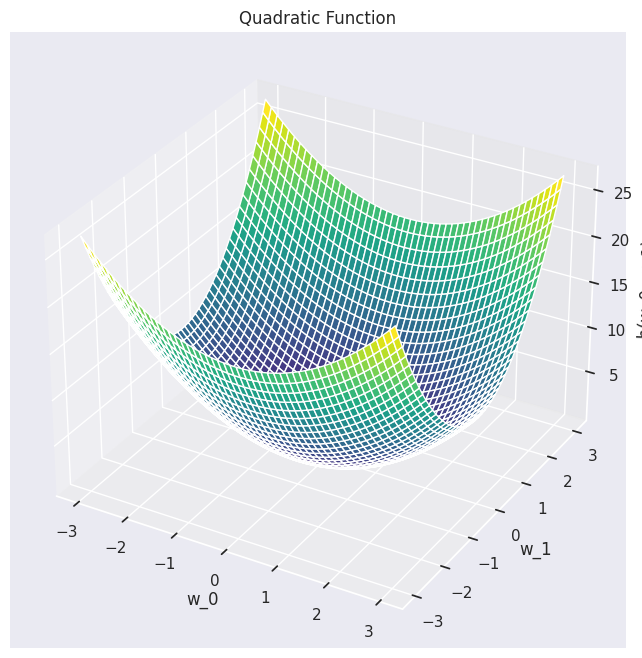

In [27]:
from mpl_toolkits import mplot3d

# Define a quadratic function in two variables
def f(w_0, w_1):
    return w_0**2 + 2 * w_1**2

# Generate a grid of points for plotting the surface
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Plot the surface of the quadratic function
ax.plot_surface(X, Y, Z, cmap='viridis')

# Label the axes and set the title
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('h(w_0, w_1)')
ax.set_title('Quadratic Function')

# Display the plot
plt.show()

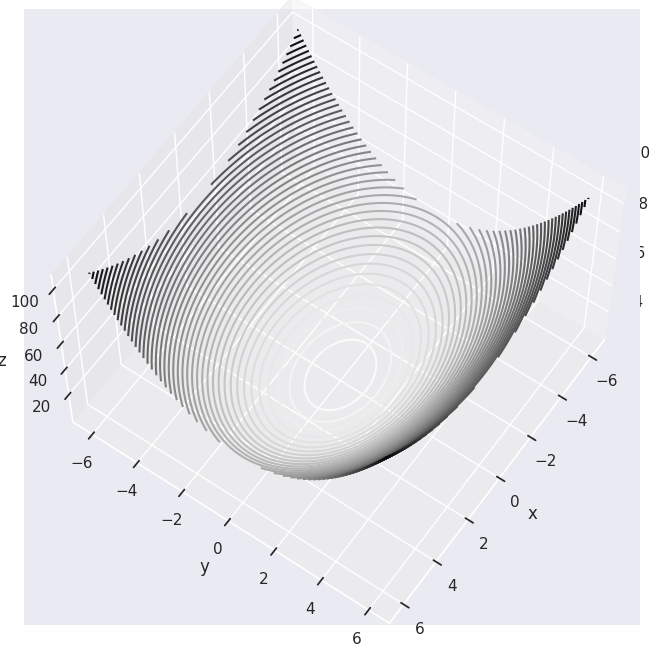

In [28]:
# Generate points for plotting the surface
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot with contour lines
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')  # Contour lines with 50 levels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Set the viewing angle for better visualization
ax.view_init(60, 35)

# Display the plot
plt.show()

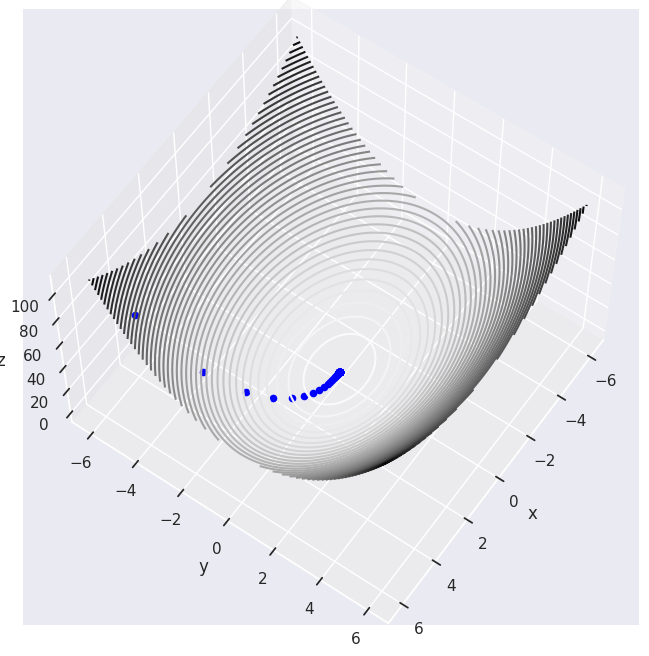

In [29]:
# Define the gradient function
def df(w):
    grad = [2 * w[0], 4 * w[1]]
    return np.array(grad)

# Gradient Descent Algorithm
def gradient_descent(derivative, W, alpha=0.8, max_iter=1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha * df(W)
        i += 1
        W_hist.append(W)
    return W_hist

# Initialize the gradient descent with a starting point
W = gradient_descent(df, np.array([5.0, -5.0]), alpha=0.1, max_iter=500)

# Generate points for plotting the surface
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D plot with contour lines and plot the optimization path
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')  # Contour lines with 50 levels
for i in range(len(W)):
    ax.scatter3D([W[i][0]],
                 [W[i][1]],
                 [f(W[i][0], W[i][1])], color="blue")  # Scatter plot the optimization path
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Set the viewing angle for better visualization
ax.view_init(60, 35)

# Display the plot
plt.show()

# Applying Gradient Descent to the Breast Cancer Dataset

In [30]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training

In [33]:
# Add a bias term to the features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize parameters (coefficients)
theta = np.zeros(X_train_bias.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Arrays to store history for visualization
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate the predicted values
    z = np.dot(X_train_bias, theta)
    h = 1 / (1 + np.exp(-z))

    # Calculate the cost
    cost = (-1/len(y_train)) * np.sum(y_train * np.log(h) + (1 - y_train) * np.log(1 - h))
    cost_history.append(cost)

    # Calculate the gradient
    gradient = np.dot(X_train_bias.T, (h - y_train)) / len(y_train)

    # Update parameters
    theta -= learning_rate * gradient

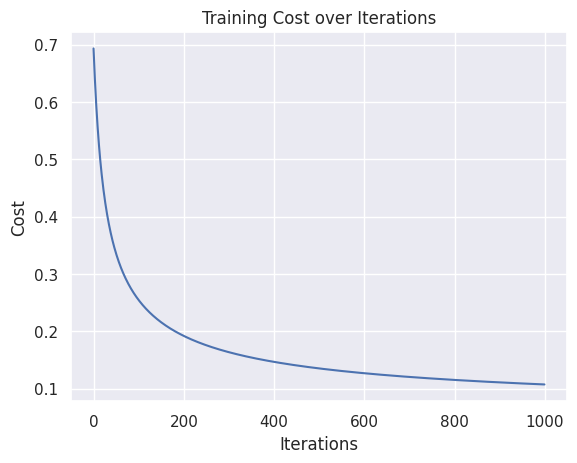

In [34]:
# Visualize the training process
plt.plot(cost_history)
plt.title('Training Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Model Evaluation

In [35]:
# Make predictions on the test set
predictions = np.round(1 / (1 + np.exp(-np.dot(X_test_bias, theta))))

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy * 100
print("Accuracy:", accuracy)

Accuracy: 98.24561403508771


In [36]:
precision = precision_score(y_test, predictions) *100
recall = recall_score(y_test, predictions) *100
f1 = f1_score(y_test, predictions) *100
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 98.59154929577466
Recall: 98.59154929577466
F1-Score: 98.59154929577466


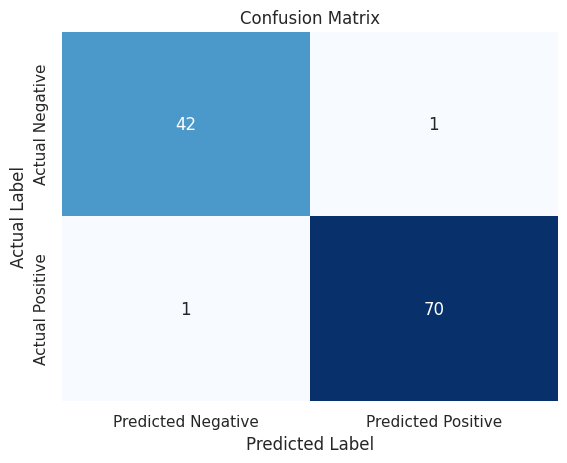

In [37]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## Conclusion

The high values for accuracy, precision, recall, and F1-Score collectively suggest that the logistic regression model, trained using Gradient Descent on the Breast Cancer dataset, is highly effective in distinguishing between malignant and benign breast masses. These results are encouraging, indicating a strong predictive capability of the model, which is crucial in medical applications where the consequences of misclassification can be significant. However, it's important to consider other aspects such as data imbalance and the specific requirements of the medical application when interpreting and applying these results.